# Predicting Fatalities from Tornado Data (Group 1)

**Authors**: Erika Delorme, Marcela Flaherty, Riddha Tuladhar, Edwin Yeung

# Summary

# Introduction

# Methods & Results

## Data 

The data set that was used in this project is from the US NOAA's National Weather Service Storm Prediction Center Severe Weather Maps, Graphics, and Data Page (Storm Prediction Center , 2024). It was tidied and sourced from TidyTuesday (Tidytuesday/Data/2023/2023-05-16 at Master · Rfordatascience/Tidytuesday).

Each row represents a tornado, along with various features, including width, length, date, time, state in the US the tornado has hit, magnitude, financial losses, number of fatalities, number of injuries, etc.

## Data wrangling and cleaning

The R programming language (R Core Team, 2022)  and the following R packages were used to conduct our analysis: repr (Angerer et al., 2023), tidyverse (Hadley Wickham & RStudio, 2017), tidymodels (Kuhn et al., 2023), psych (Revelle, 2019), and GGally (Schloerke et al., 2020).

The code used to perform the analysis and create this report can be found here: https://github.com/DSCI-310-2024/DSCI-310-Group-1-Predict-Fatalities-From-Tornado-Data/blob/main/src/tornado_fatalities_predictor.ipynb. 

1. First, we load the necessary packages. 

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(psych)
library(GGally)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5      ✔ rsample      1.2.0 
✔ dials        1.2.1      ✔ tune         1.1.2 
✔ infer        1.0.6      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.0.1 
✔ parsnip      1.2.0      ✔ yardstick    1.3.0 
✔ recipes      1.0.10     

── Con

2. Then, we read in the data about tornadoes directly from the website. 

In [2]:
# Load data
URL <- "https://raw.githubusercontent.com/rfordatascience/tidytuesday/a9e277dd77331e9091e151bb5adb584742064b3e/data/2023/2023-05-16/tornados.csv"
tornado_data <- read.csv(URL)

head(tornado_data)

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,⋯,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,⋯,-102.30,15.8,10,1,1,25,0,0,0,FALSE
2,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,⋯,0.00,2.0,880,1,1,47,0,0,0,FALSE
3,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,⋯,0.00,0.1,10,1,1,177,0,0,0,FALSE
4,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,⋯,0.00,0.1,10,1,1,209,0,0,0,FALSE
5,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,⋯,0.00,2.0,37,1,1,101,0,0,0,FALSE
6,194,1950,11,4,1950-11-04,17:00:00,America/Chicago,1950-11-04T23:00:00Z,PA,42,⋯,-75.93,15.9,100,1,1,71,11,0,0,FALSE


3. Next, we wrangle and clean the data. Firstly, we check for missing values in our cleaned data.

In [4]:
sapply(tornado_data, function(x) sum(is.na(x)))

om           yr           mo           dy         date         time 
           0            0            0            0            0            0 
          tz datetime_utc           st          stf          mag          inj 
           0            0            0            0          756            0 
         fat         loss         slat         slon         elat         elon 
           0        27170            0            0            0            0 
         len          wid           ns           sn           f1           f2 
           0            0            0            0            0            0 
          f3           f4           fc 
           0            0            0

We can see that there are no missing values, except for the feature `loss`, with 27,170 missing values and 756 missing values for the feature mag.  The feature `loss` refers to the financial loss of each tornado. For our regression problem, we did not deem this feature to be an important feature. Therefore, we decide to remove this column. 

Because there are not so many rows missing for the feature `mag`, we decide to filter those rows out. 

4. Then, we remove irrelevant or repetitive columns and then filter for missing values of the column `mag`, which stands for magnitude. Then, we change the feature names to make them more descriptive. We show the top 6 rows of our cleaned data. 

In [5]:
# Wrangle and clean data

# Remove irrelevant or repetitive columns, and filter for NA in magnitude
df <- tornado_data %>%
    select(-date, -tz, -stf, -sn, -f1, -f2, -f3, -f4, -fc, -loss) %>%
    filter(!is.na(mag)) 

# Change feature names to be more descriptive
names(df) <- c('ID','year','month','day','time','datetime_utc','state','mag','injuries',
               'fatalities','start_lat','start_lon','end_lat','end_lon','length','width','ns')

head(df)

,ID,year,month,day,time,datetime_utc,state,mag,injuries,fatalities,start_lat,start_lon,end_lat,end_lon,length,width,ns
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,192,1950,10,1,21:00:00,1950-10-02T03:00:00Z,OK,1,0,0,36.73,-102.52,36.88,-102.30,15.8,10,1
2,193,1950,10,9,02:15:00,1950-10-09T08:15:00Z,NC,3,3,0,34.17,-78.60,0.00,0.00,2.0,880,1
3,195,1950,11,20,02:20:00,1950-11-20T08:20:00Z,KY,2,0,0,37.37,-87.20,0.00,0.00,0.1,10,1
4,196,1950,11,20,04:00:00,1950-11-20T10:00:00Z,KY,1,0,0,38.20,-84.50,0.00,0.00,0.1,10,1
5,197,1950,11,20,07:30:00,1950-11-20T13:30:00Z,MS,1,3,0,32.42,-89.13,0.00,0.00,2.0,37,1
6,194,1950,11,4,17:00:00,1950-11-04T23:00:00Z,PA,3,1,0,40.20,-76.12,40.40,-75.93,15.9,100,1


In [3]:
# This is to export cleaned data frame to new csv file
#write_csv(df, "C:\\Users\\Erika\\DSCI-310-Group-1-Predict-Fatalities-From-Tornado-Data\\data\\processed\\cleaned_tornado_data.csv")

## EDA: Descriptive statistics and visualizations

5. Next, we create a summary table of features that could be useful to use in our regression model. 

In [6]:
describe(df[, c('mag', 'injuries', 'fatalities', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 
                'length', 'width', 'ns')], fast = TRUE)

,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mag,1,67937,0.77872146,0.89578979,0.0000,5.0000,5.0000,0.0034367894
injuries,2,67937,1.43447606,18.21464265,0.0000,1740.0000,1740.0000,0.0698823454
fatalities,3,67937,0.09030425,1.48025841,0.0000,158.0000,158.0000,0.0056791633
start_lat,4,67937,37.12084145,5.10796577,17.7212,61.0200,43.2988,0.0195972348
start_lon,5,67937,-92.70567031,8.67919628,-163.5300,-64.7151,98.8149,0.0332986271
end_lat,6,67937,22.79438471,18.55826645,0.0000,61.0200,61.0200,0.0712006934
end_lon,7,67937,-56.38062159,45.38037316,-163.5300,0.0000,163.5300,0.1741064579
length,8,67937,3.51464195,8.28672352,0.0000,234.7000,234.7000,0.0317928651
width,9,67937,108.42309787,207.81143767,0.0000,4576.0000,4576.0000,0.7972899033


**Table 1**: Summary table of numerical features

6. We create a correlation matrix to view the correlations between features related to `injuries` and `fatalities`. 

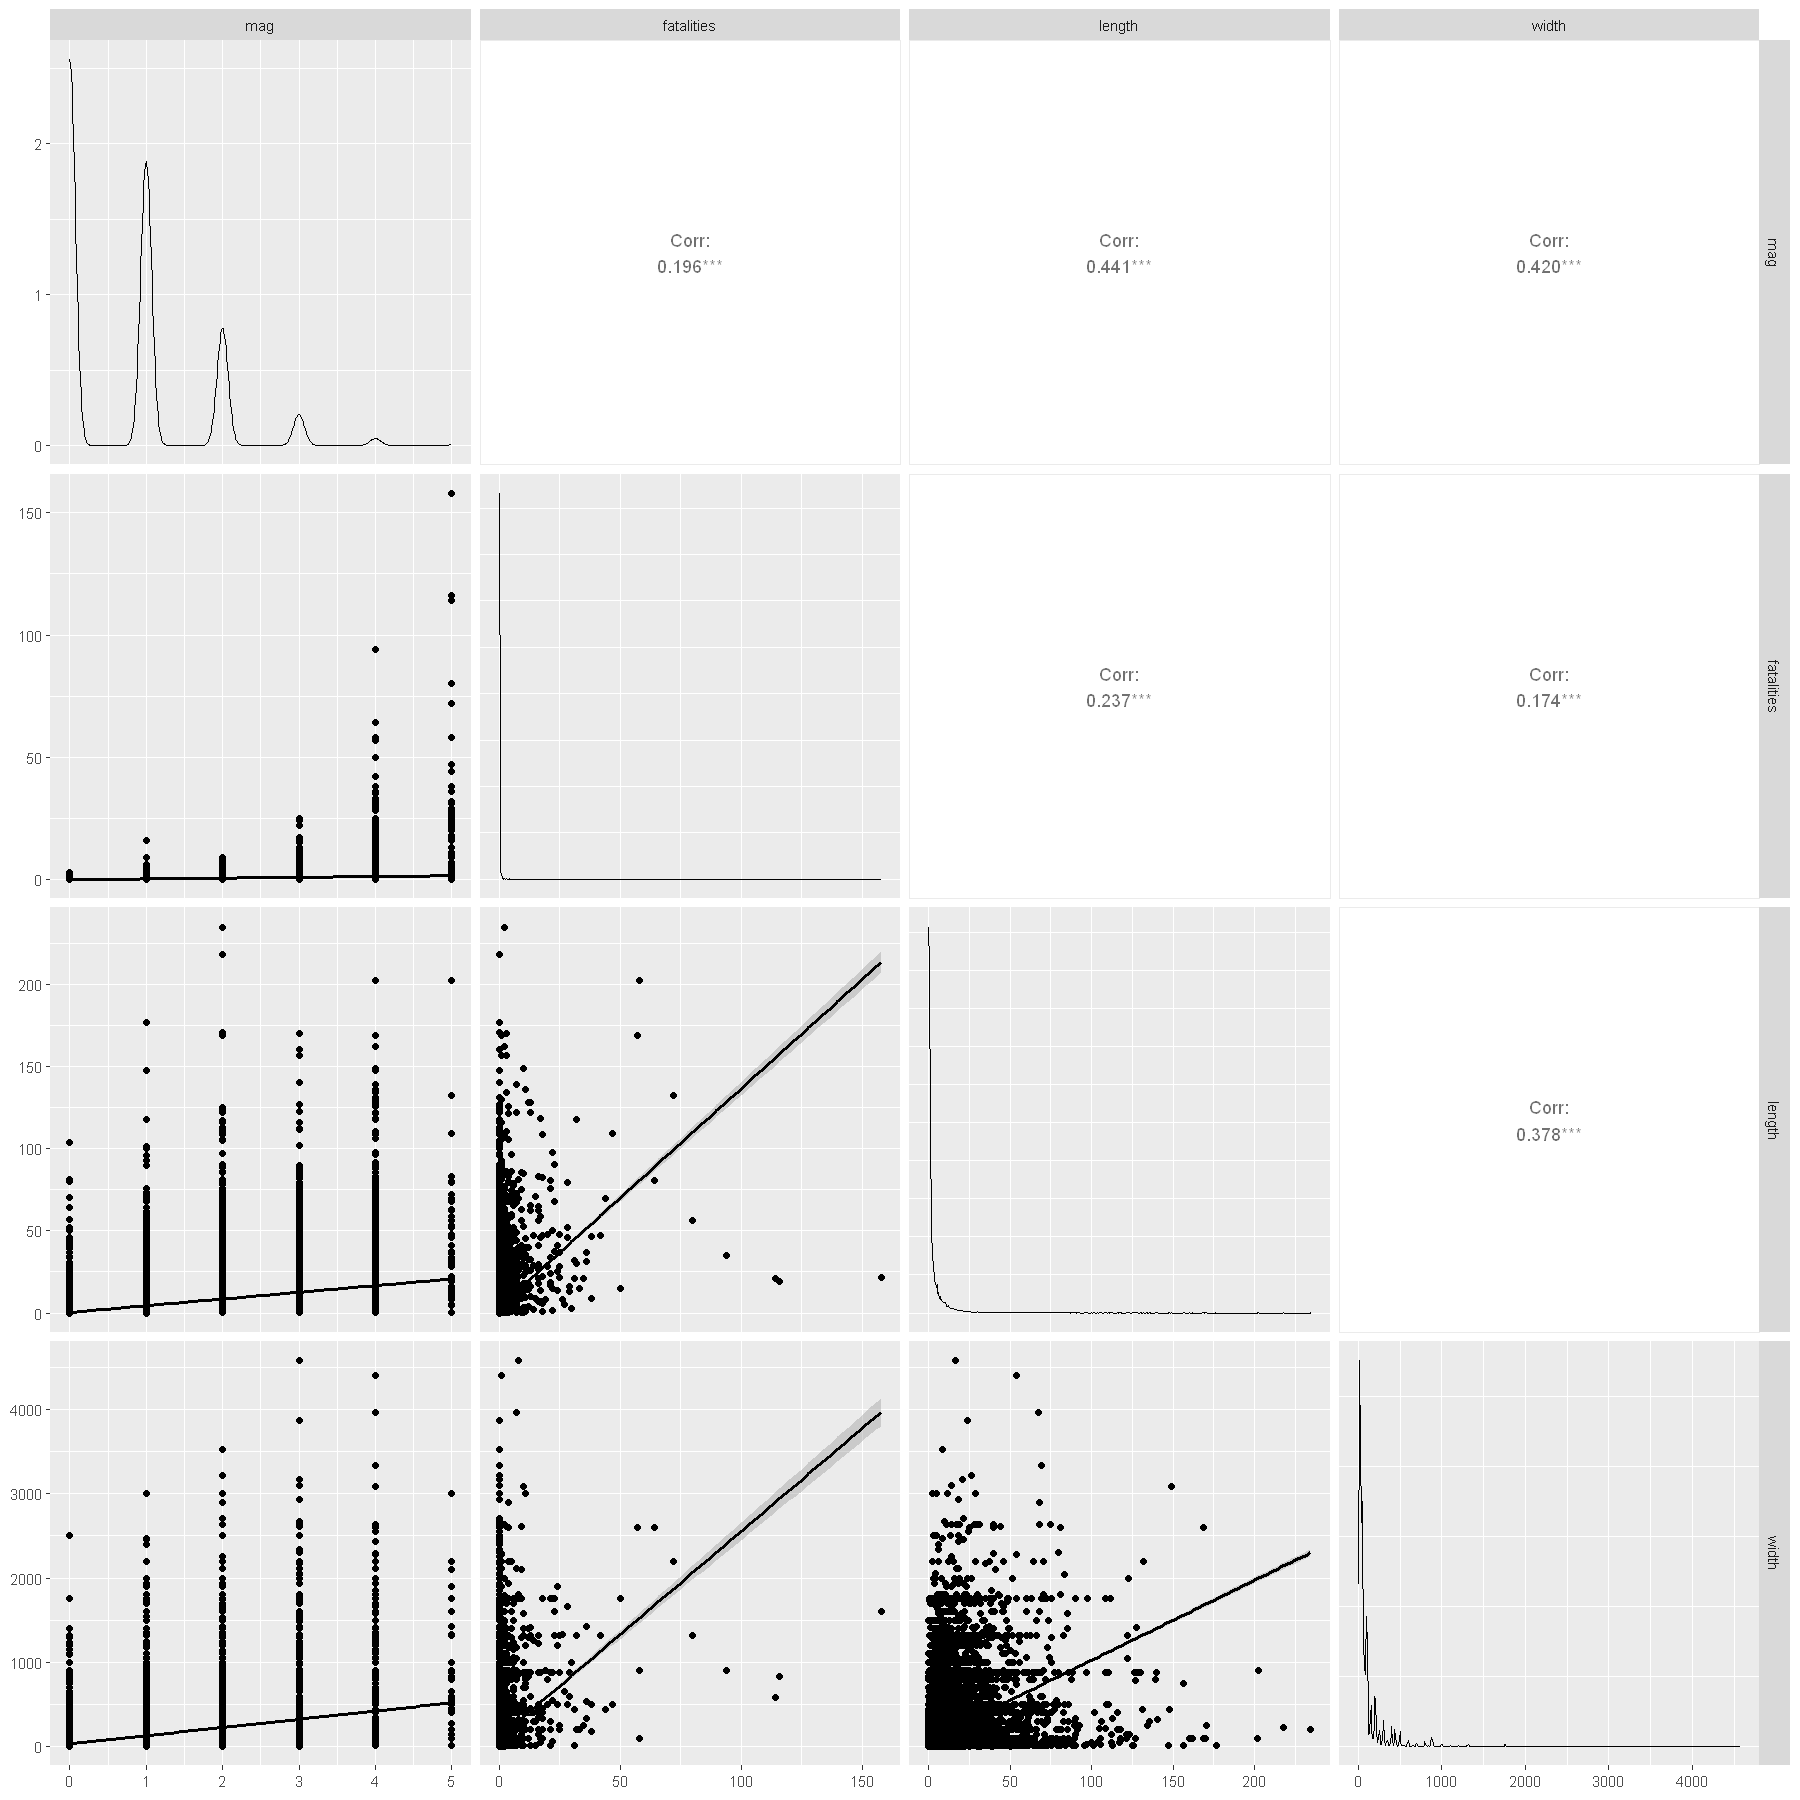

In [9]:
options(repr.plot.width = 15, repr.plot.height = 15)

correlations_plot <- df %>%
    ggpairs(
        columns = c("mag", "fatalities", "length", "width"), 
        lower = list(
            continuous = "smooth", 
            combo = wrap("facethist", binwidth = 2))) +
    theme(plot.title = element_text(size = 22, hjust = 0.5))
correlations_plot

**Figure 1**: Correlation matrix of important numeral features and target

From the correlation matrix, we observe that there are some small sized correlations between `fatalities` and other continuous features. For example, there is a correlation of `0.237` between `length` and `fatalities` and a correlation of `0.174` between `width` and `fatalities`.

There are also correlations between features that are not the target. For example, there is medium sized correlation of `0.441` between `length` and `mag` and a correlation of 0.420 between `width` and `mag`.

These small to medium correlations may suggest that these features could be useful in predicting fatalities.

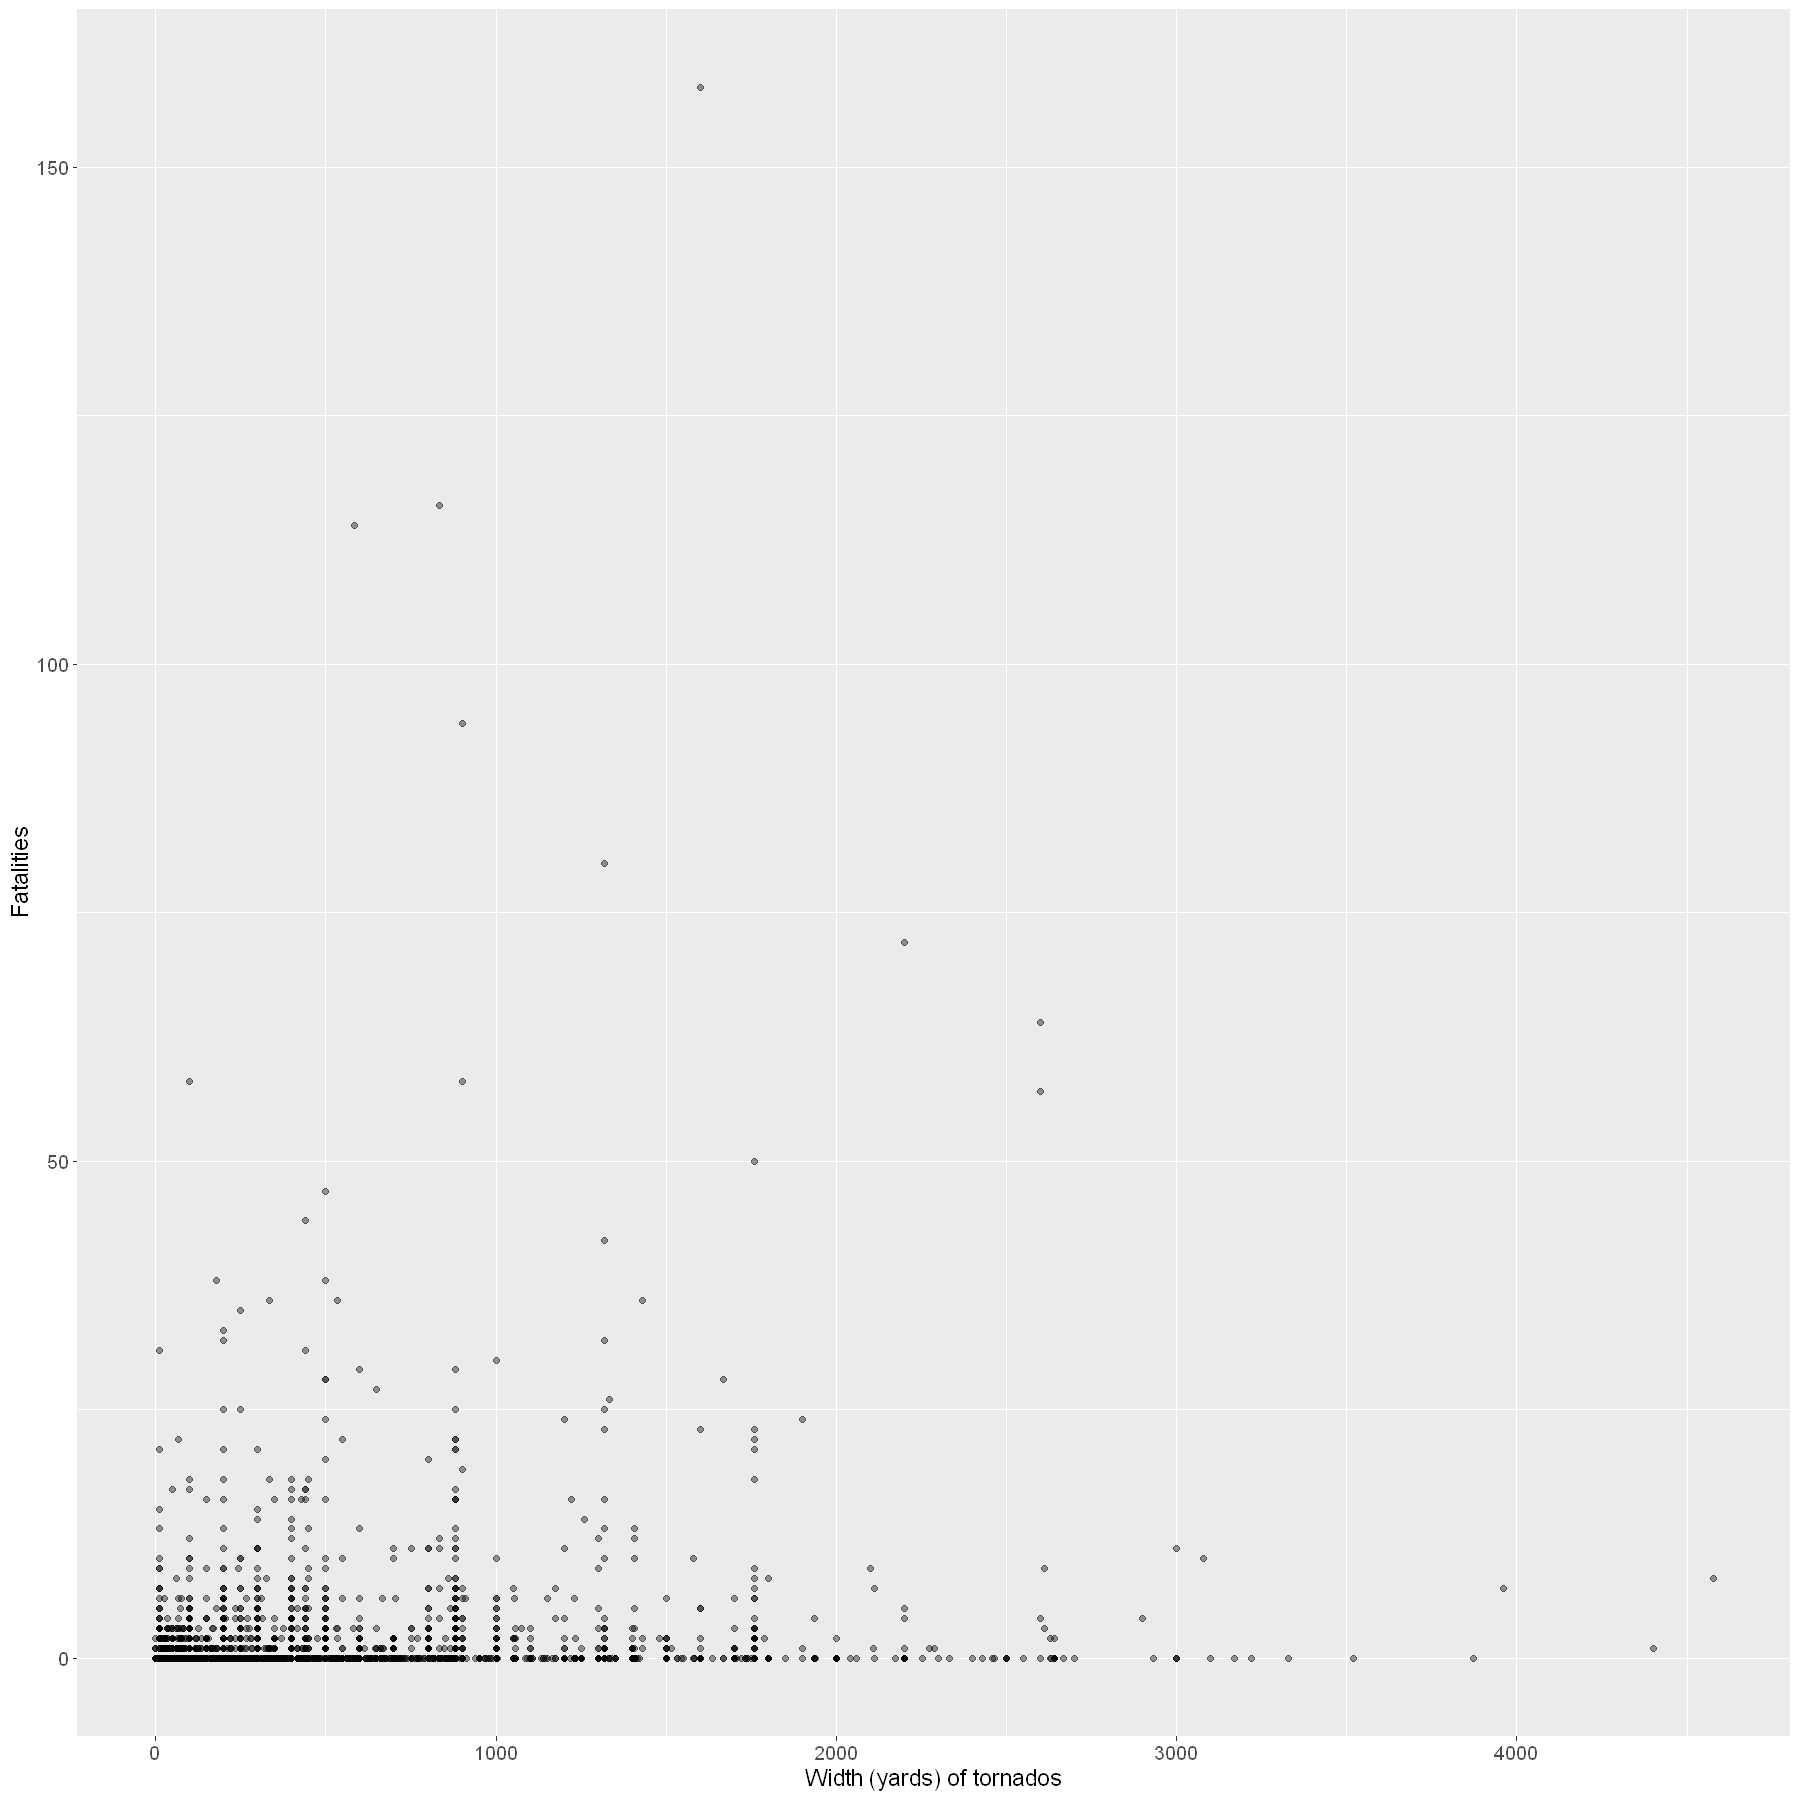

In [10]:
fatalities_width_scatterplot = ggplot(df, aes(x = width, y = fatalities)) +
    geom_point(alpha = 0.4) +
    xlab("Width (yards) of tornados") +
    ylab("Fatalities") +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5)) 
fatalities_width_scatterplot

**Figure 2**: Scatterplot of width (yards) of tornado and fatalities

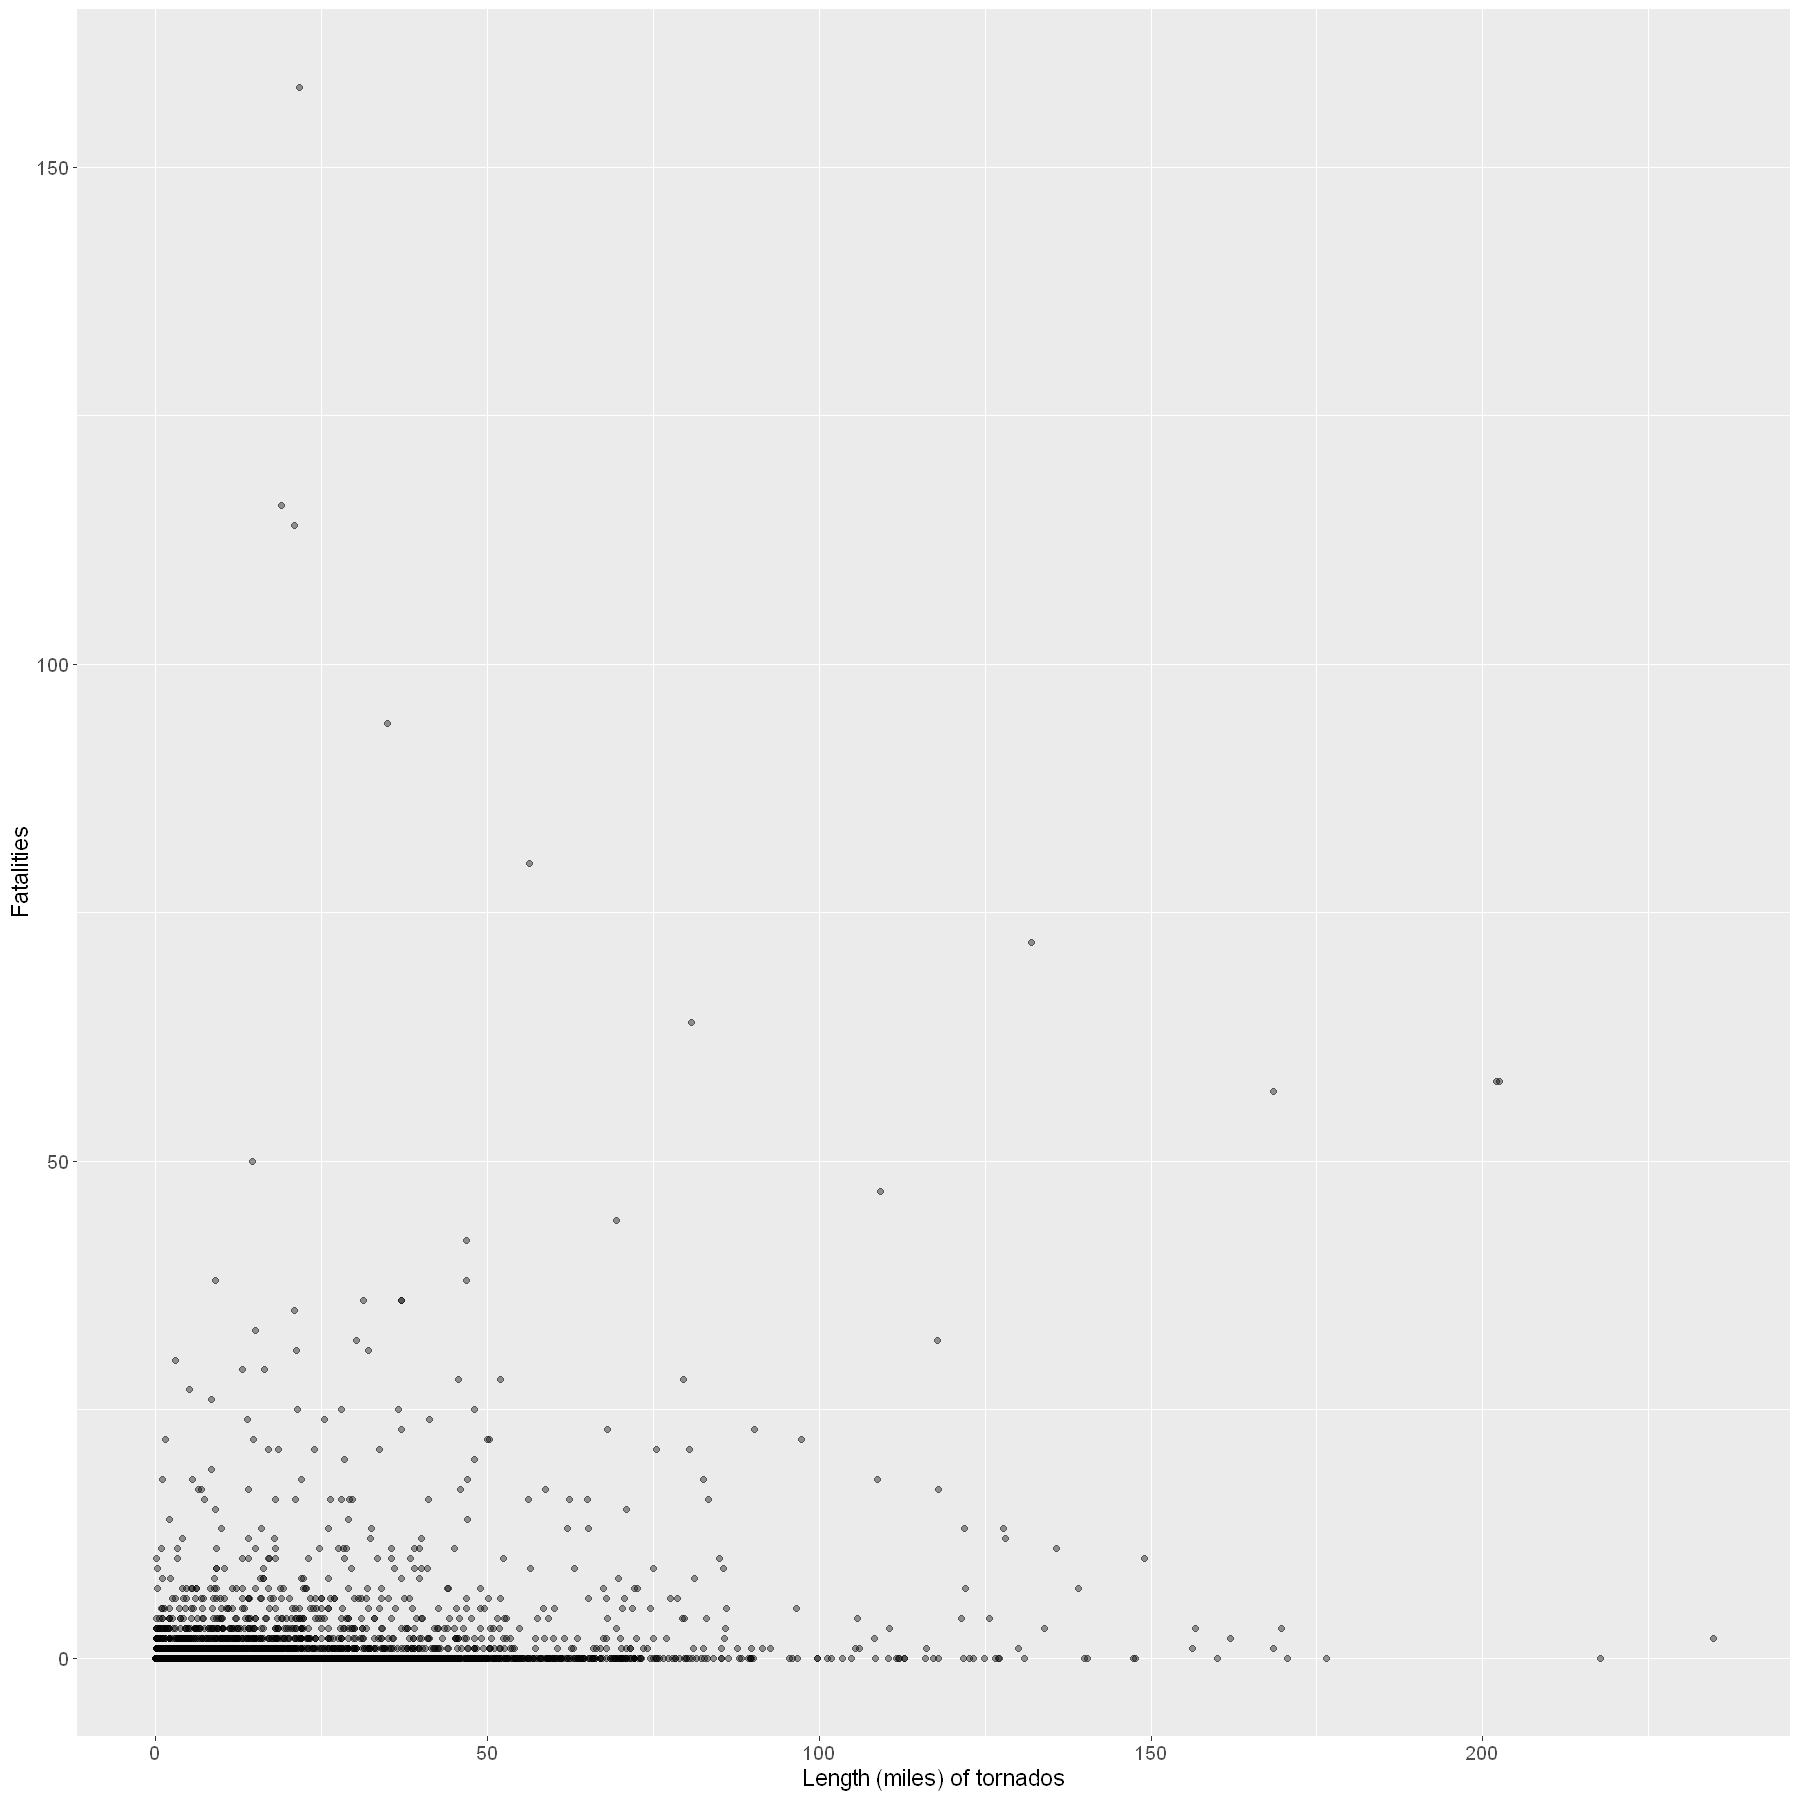

In [12]:
fatalities_length_scatterplot = ggplot(df, aes(x = length, y = fatalities)) +
    geom_point(alpha = 0.4) +
    xlab("Length (miles) of tornados") +
    ylab("Fatalities") +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5)) 
fatalities_length_scatterplot

**Figure 3**: Scatterplot of length (miles) of tornado and fatalities

Based on the correlation matrix, we decide to use `length` and `width` as features in our model as they are numerical unlike `mag`. 

## Model selection and analysis

7. We split our data into two sets: `train_df` and `test_df`. `train_df` consists of 75% of our original data set and is used to train our regression model. The remaining 25% of our original data is `test_df`, which we use later to test the accuracy of our model at prediction. 

In [10]:
set.seed(2000)

data_split <- initial_split(df, prop = 0.75, strata = fatalities)
train_df <- training(data_split)
test_df <- testing(data_split)

8. As mentioned previously, our group has decided that we will use a linear regression model to predict tornado casualties. We will be using the variables `width` and `length` as our predictors. The former is a measure of the width of a tornado, while the latter is a measure of length. The units of measurements are yards and miles, respectively.

   Now that we have our training data `train_df`, we can fit our linear regression model. We will first specify our model, and then proceed to fit our model and obtain the regression coefficients.

In [11]:
# specify prediction model
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# specify recipe
lm_recipe <- recipe(fatalities ~ length + width, data = df)

# fit the model based on the recipe, specification and training data
lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = train_df)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)       length        width  
 -0.1183680    0.0367960    0.0007337  


9. Now that we have our model, we can predict on the testing data `test_df` to assess how well it does.

In [12]:
# Use lm_fit to predict on test_df and output RMSPE to assess model's test error
lm_test_results <- lm_fit |>
  predict(test_df) |>
  bind_cols(test_df) |>
  metrics(truth = fatalities, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.00567700
rsq,standard,0.08983574
mae,standard,0.22985357


10. We can visualize our linear regression model to get a better idea of how well it performs.

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


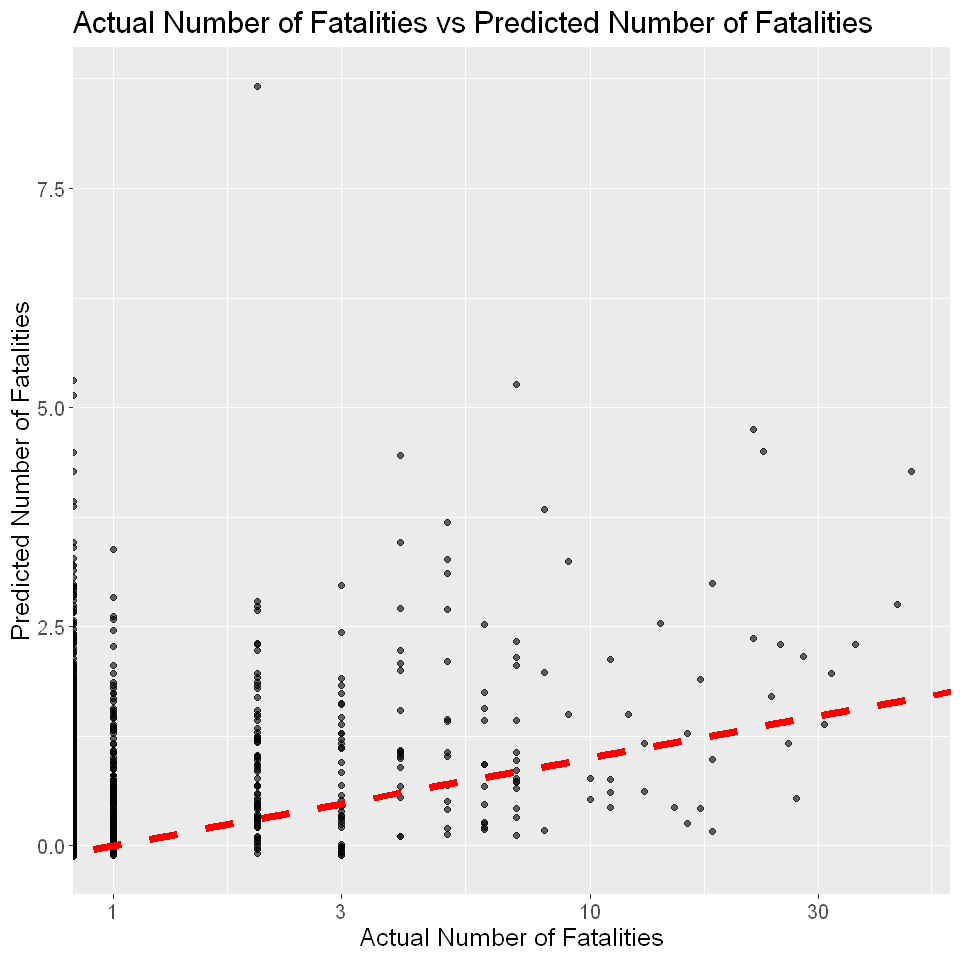

Warning message:
"Transformation introduced infinite values in continuous y-axis"


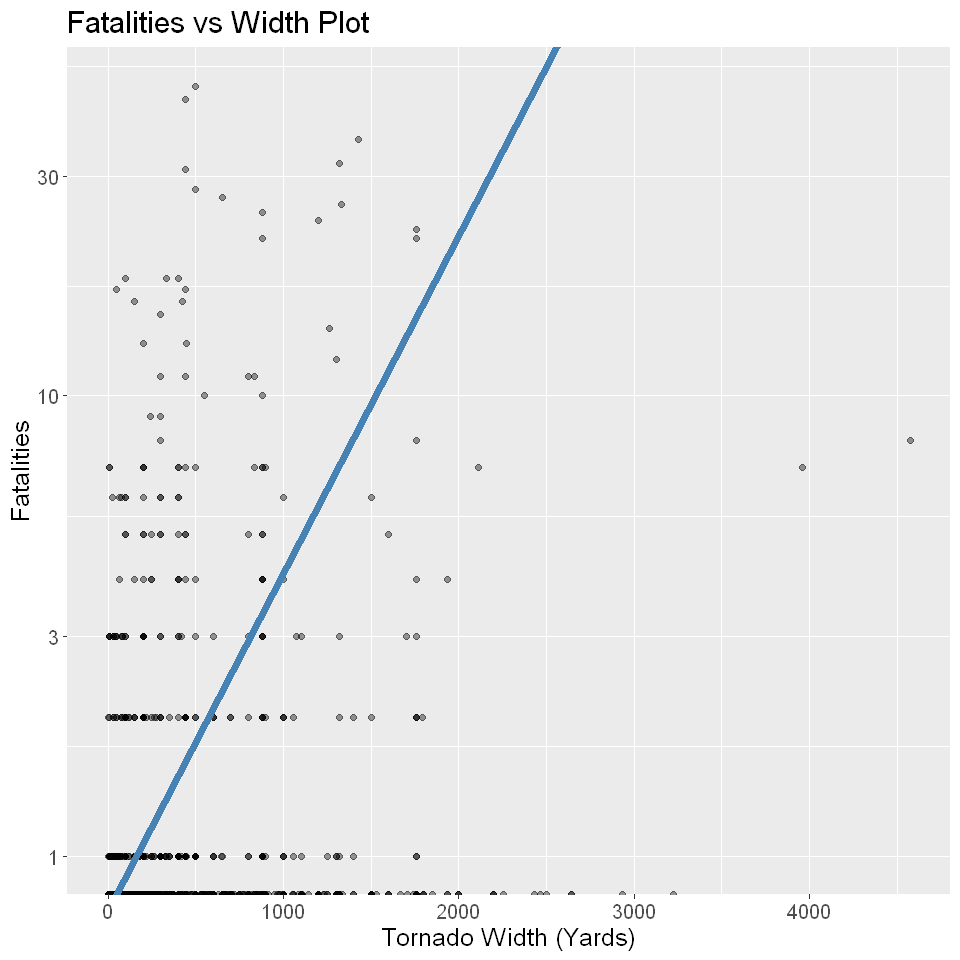

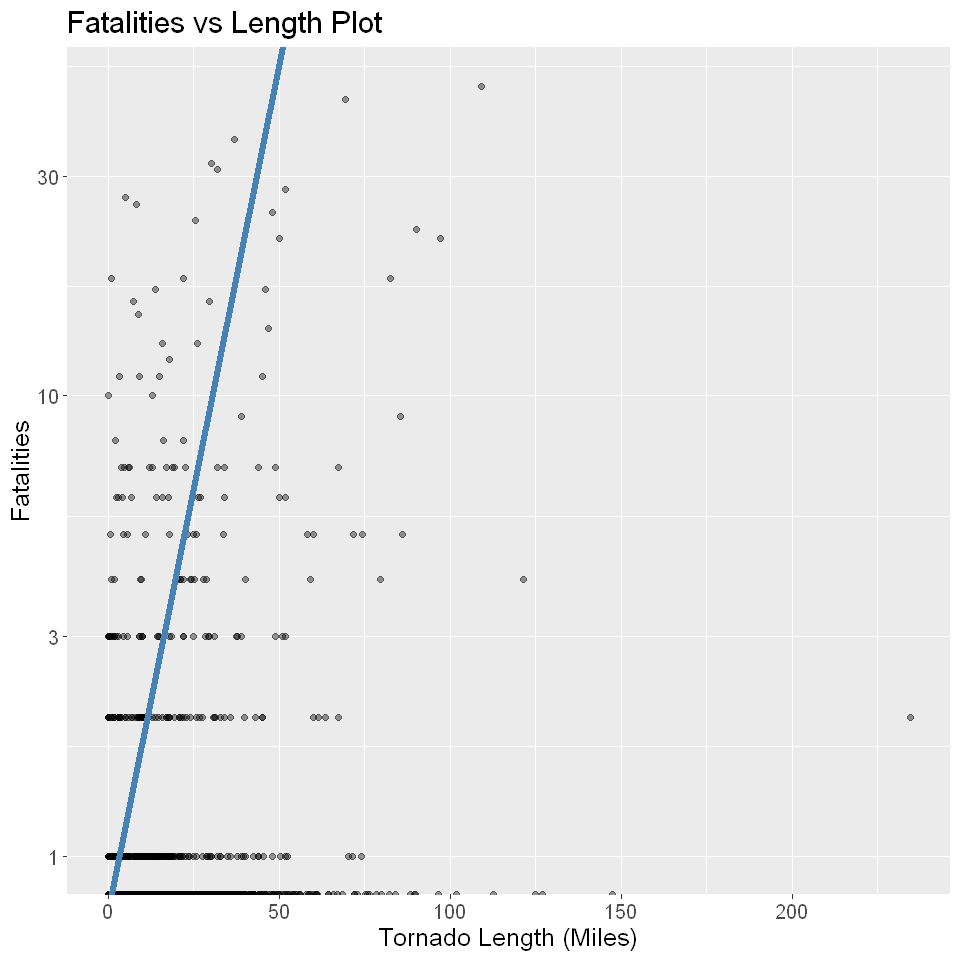

In [13]:
# Creating plots showing accuracy of linear regression model
fatal_rsmpe <- lm_test_results |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

fatal_predictions <- lm_fit |>
    predict(test_df) |>
    bind_cols(test_df)

options(repr.plot.width = 8, repr.plot.height = 8)

## Note: Red line represents where points would be plotted if the model was 100% accurate
fatal_model_viz <- ggplot(fatal_predictions, aes(x = fatalities, y = .pred)) +
    geom_point(alpha = 0.6) +
    # geom_line(data = fatal_predictions,
    #        mapping = aes(x = fatalities, y = .pred),
    #        color = "steelblue",
    #        linewidth = 1) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", linewidth = 2)+
    scale_x_continuous(trans = "log10") + 
    xlab("Actual Number of Fatalities") +
    ylab("Predicted Number of Fatalities") +
    ggtitle("Actual Number of Fatalities vs Predicted Number of Fatalities") +
    theme(text = element_text(size = 15))

fatal_model_viz

## Note: Blue line represents predicted values based on our regression model when tornado length = 0
fatal_widths_plot <- ggplot(test_df, aes(x = width, y = fatalities)) +
     geom_point(alpha = 0.4) +
     # geom_line(data = fatal_predictions,
     #       mapping = aes(x = width, y = .pred),
     #       color = "steelblue",
     #       linewidth = 1) +
     geom_abline(intercept = -0.1183680, slope = 0.0007337, color = "steelblue", linewidth = 2) +
     scale_y_continuous(trans = "log10") + 
     xlab("Tornado Width (Yards)") +
     ylab("Fatalities") +
     ggtitle("Fatalities vs Width Plot") +
     theme(text = element_text(size = 15))

fatal_widths_plot

## Note: Blue line represents predicted values based on our regression model when tornado width = 0
fatal_length_plot <- ggplot(test_df, aes(x = length, y = fatalities)) +
     geom_point(alpha = 0.4) +
     # geom_line(data = fatal_predictions,
     #       mapping = aes(x = length, y = .pred),
     #       color = "steelblue",
     #       linewidth = 1) +
     geom_abline(intercept = -0.1183680, slope = 0.0367960, color = "steelblue", linewidth = 2) +
     scale_y_continuous(trans = "log10") + 
     xlab("Tornado Length (Miles)") +
     ylab("Fatalities") +
     ggtitle("Fatalities vs Length Plot") +
     theme(text = element_text(size = 15))

fatal_length_plot

Note there are clear outliers in the data, thus we will perform the same analysis after removing the outliers.

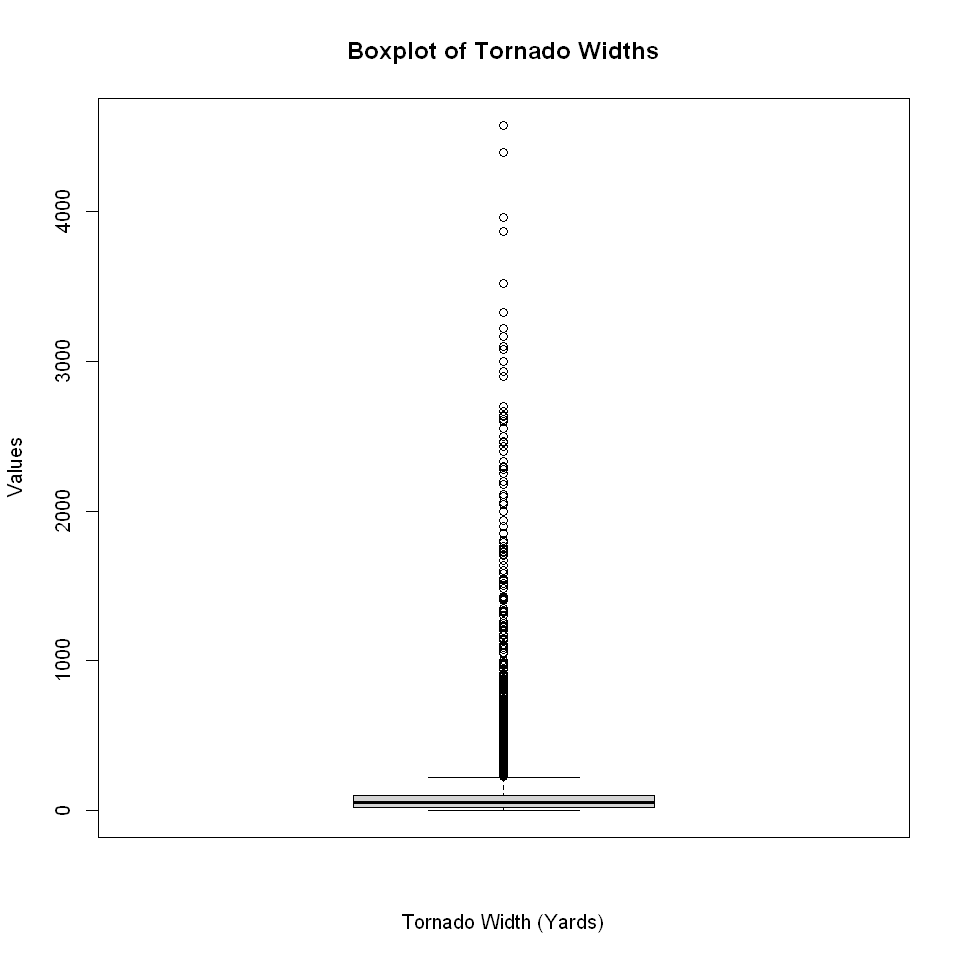

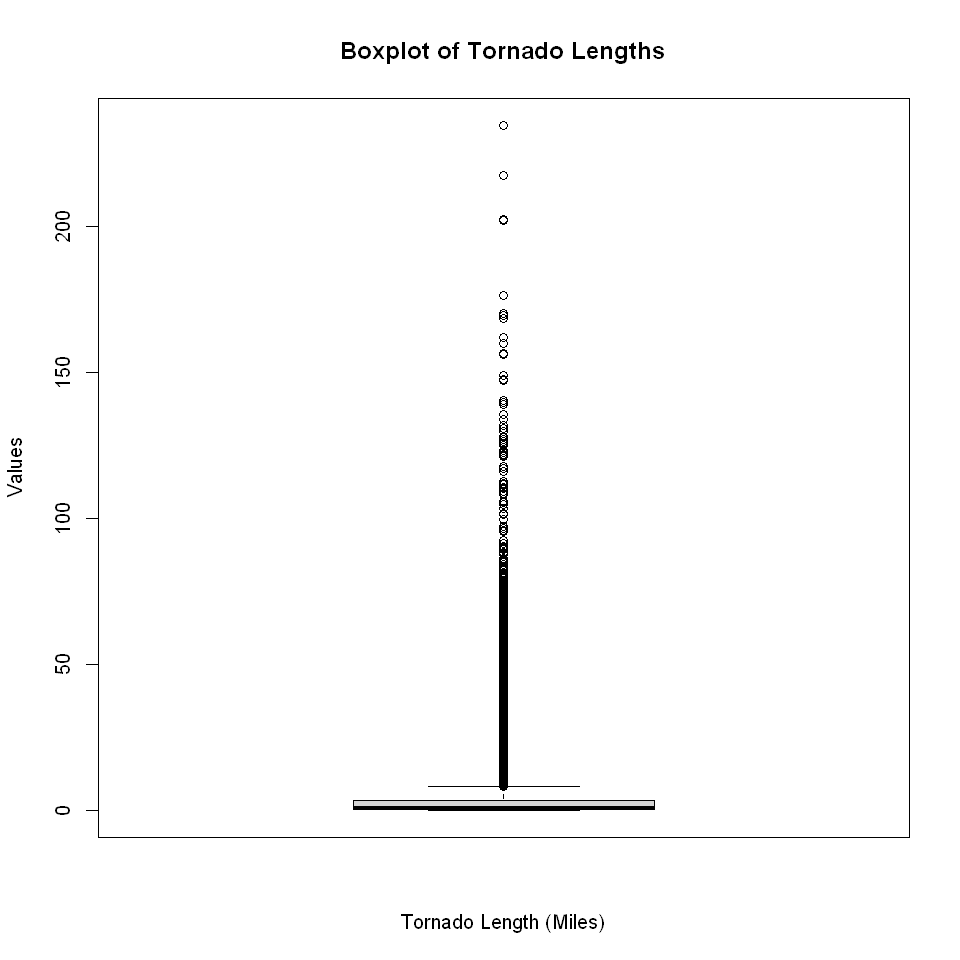

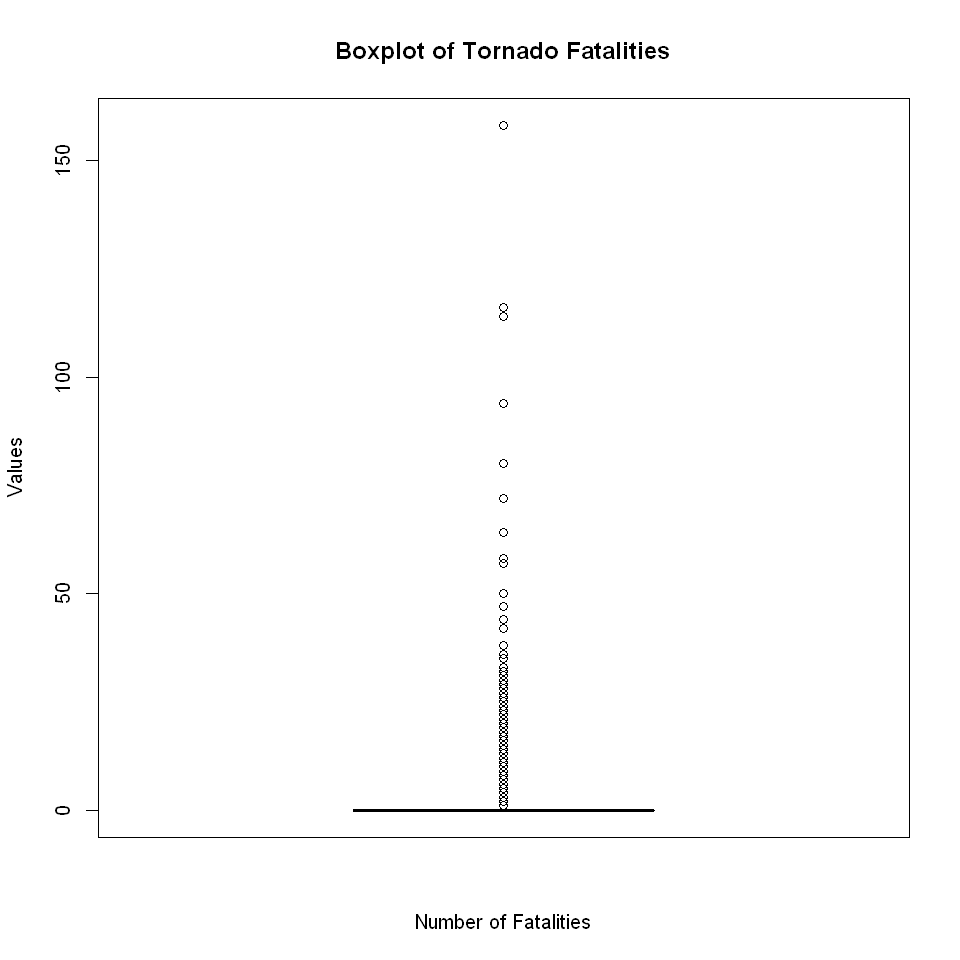

In [14]:
# Checking for outliers

boxplot(df$width, main = "Boxplot of Tornado Widths", ylab = "Values", xlab = "Tornado Width (Yards)")
boxplot(df$length, main = "Boxplot of Tornado Lengths", ylab = "Values", xlab = "Tornado Length (Miles)")
boxplot(df$fatalities, main = "Boxplot of Tornado Fatalities", ylab = "Values", xlab = "Number of Fatalities")

Note that, as the majority of tornadoes cause no fatalities and thus removing these outliers will leave us with data only containing tornadoes that caused no death, we will not be filtering outliers for fatalities.

In [15]:
# Removing outliers from data frame
width_upper_fence <- unname(quantile(df$width, 0.75)) + (1.5 * IQR(df$width))
width_lower_fence <- unname(quantile(df$width, 0.25)) - (1.5 * IQR(df$width))

length_upper_fence <- unname(quantile(df$length, 0.75)) + (1.5 * IQR(df$length))
length_lower_fence <- unname(quantile(df$length, 0.25)) - (1.5 * IQR(df$length))

outlierless_df <- df |>
    filter(width <= width_upper_fence) |>
    filter(width >= width_lower_fence) |>
    filter(length <= length_upper_fence) |>
    filter(length >= length_lower_fence)

In [14]:
# ## Creating box plots to confirm outliers have been removed
# boxplot(outlierless_df$width, main = "Boxplot of Tornado Widths", ylab = "Values", xlab = "Tornado Width (Yards)")
# boxplot(outlierless_df$length, main = "Boxplot of Tornado Lengths", ylab = "Values", xlab = "Tornado Length (Miles)")

In [16]:
# Creating new model with the new data frame without outliers

set.seed(2000)

new_data_split <- initial_split(outlierless_df, prop = 0.75, strata = fatalities)
new_train_df <- training(new_data_split)
new_test_df <- testing(new_data_split)

new_lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# specify recipe
new_lm_recipe <- recipe(fatalities ~ length + width, data = outlierless_df)

# fit the model based on the recipe, specification and training data
new_lm_fit <- workflow() |>
  add_recipe(new_lm_recipe) |>
  add_model(new_lm_spec) |>
  fit(data = new_train_df)

new_lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)       length        width  
 -0.0022491    0.0048939    0.0001736  


In [17]:
# Use new_lm_fit to predict on new_test_df and output RMSPE to assess model's test error
new_lm_test_results <- new_lm_fit |>
  predict(new_test_df) |>
  bind_cols(new_test_df) |>
  metrics(truth = fatalities, estimate = .pred)

new_lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.189469674
rsq,standard,0.004646338
mae,standard,0.024224239


Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


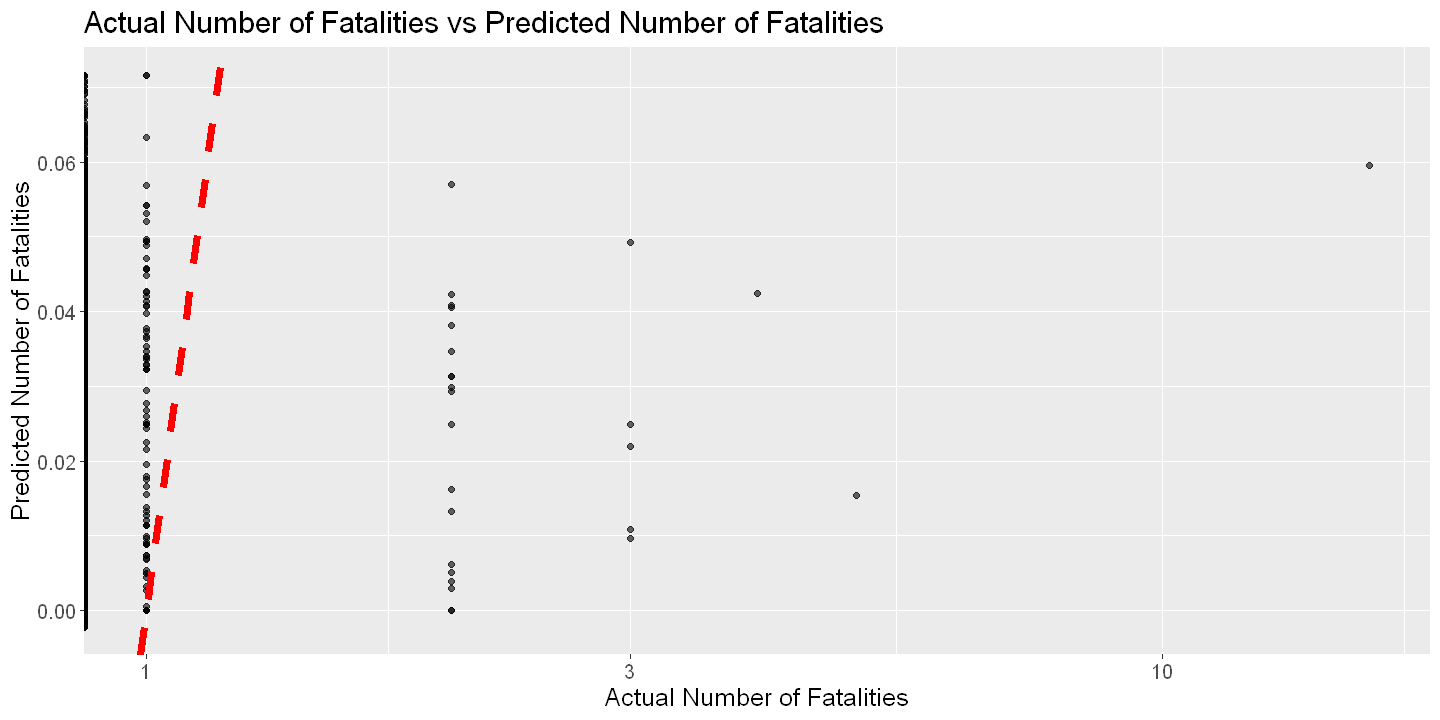

Warning message:
"Transformation introduced infinite values in continuous y-axis"


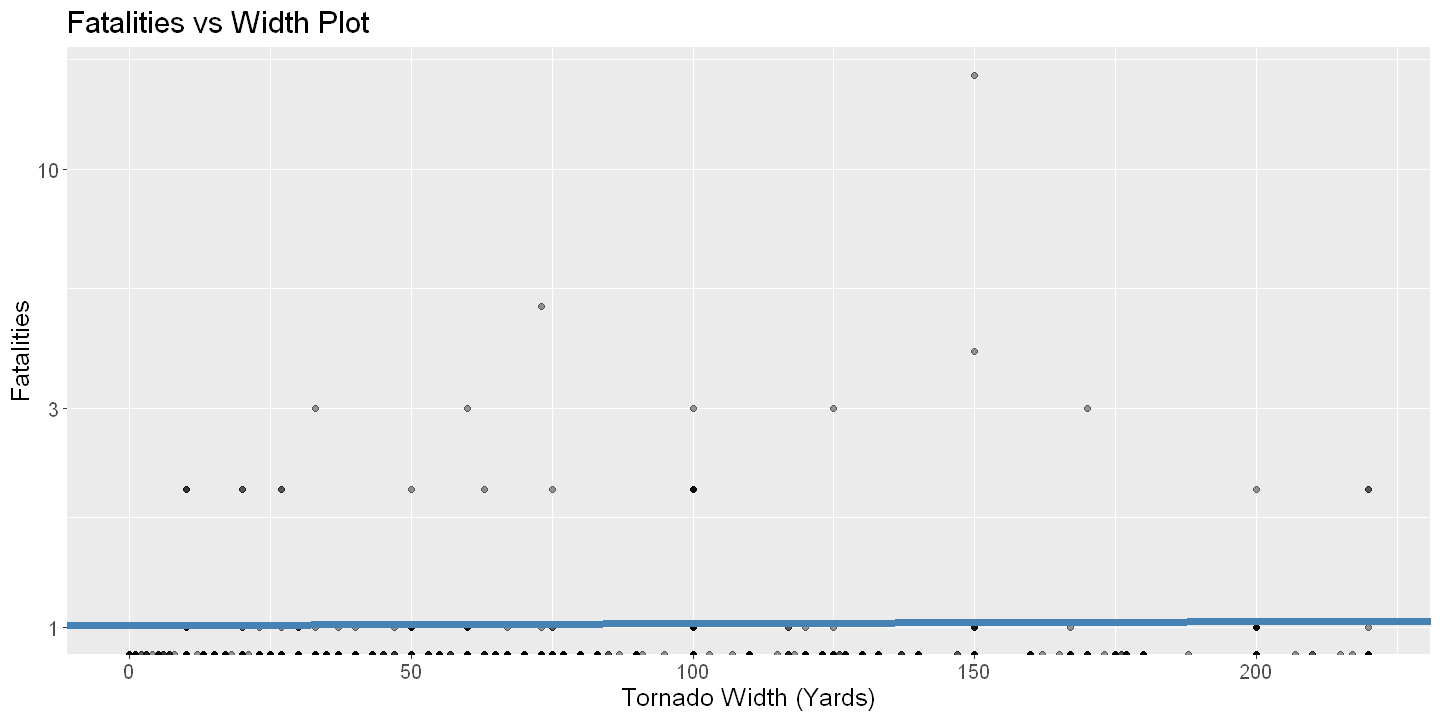

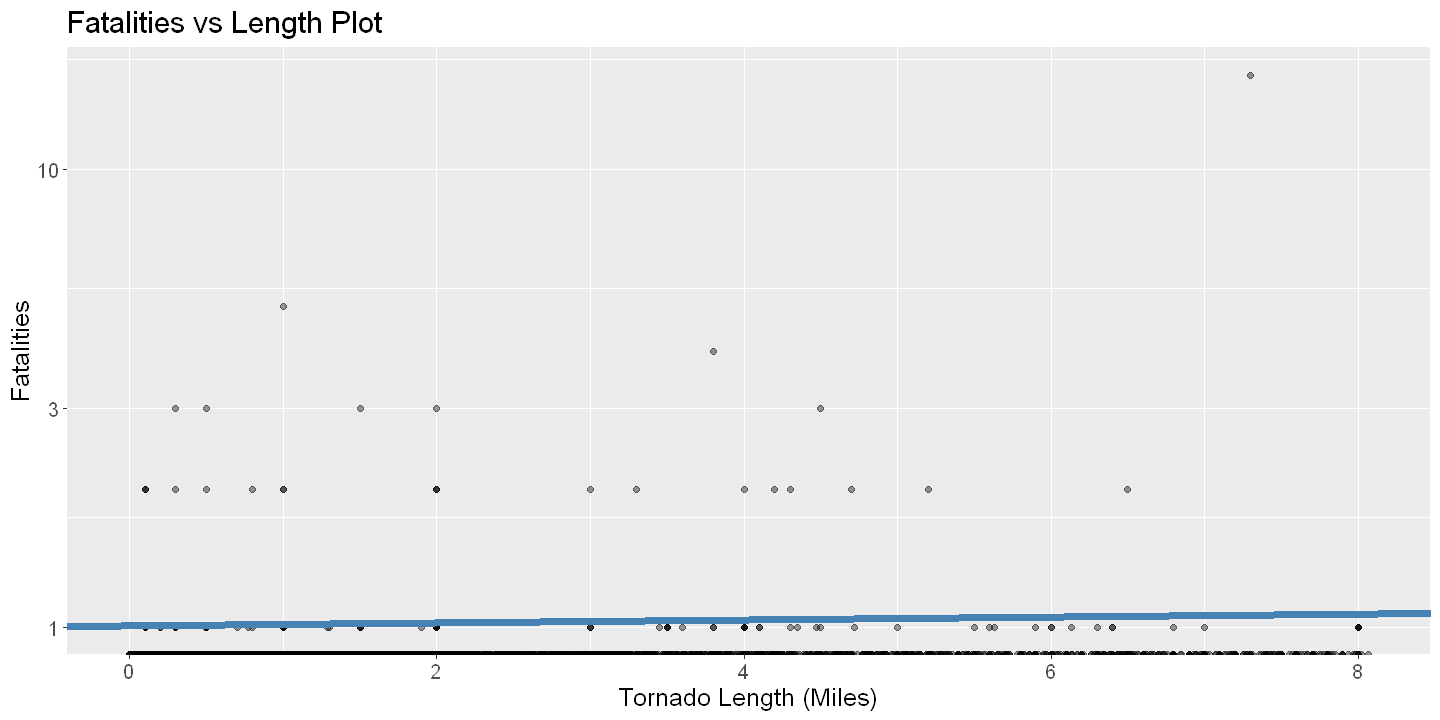

In [18]:
# Creating plots showing accuracy of new linear regression model
new_fatal_rsmpe <- new_lm_test_results |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

new_fatal_predictions <- new_lm_fit |>
    predict(new_test_df) |>
    bind_cols(new_test_df)

options(repr.plot.width = 12, repr.plot.height = 6)

## Note: Red line represents where points would be plotted if the model was 100% accurate
new_fatal_model_viz <- ggplot(new_fatal_predictions, aes(x = fatalities, y = .pred)) +
    geom_point(alpha = 0.6) +
    # geom_line(data = fatal_predictions,
    #        mapping = aes(x = fatalities, y = .pred),
    #        color = "steelblue",
    #        linewidth = 1) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", linewidth = 2)+
    scale_x_continuous(trans = "log10") + 
    xlab("Actual Number of Fatalities") +
    ylab("Predicted Number of Fatalities") +
    ggtitle("Actual Number of Fatalities vs Predicted Number of Fatalities") +
    theme(text = element_text(size = 15))

new_fatal_model_viz

## Note: Blue line represents predicted values based on our regression model when tornado length = 0
new_fatal_widths_plot <- ggplot(new_test_df, aes(x = width, y = fatalities)) +
     geom_point(alpha = 0.4) +
     # geom_line(data = fatal_predictions,
     #       mapping = aes(x = width, y = .pred),
     #       color = "steelblue",
     #       linewidth = 1) +
     geom_abline(intercept = 0.003074, slope = 0.00004429, color = "steelblue", linewidth = 2) +
     scale_y_continuous(trans = "log10") + 
     xlab("Tornado Width (Yards)") +
     ylab("Fatalities") +
     ggtitle("Fatalities vs Width Plot") +
     theme(text = element_text(size = 15))

new_fatal_widths_plot

## Note: Blue line represents predicted values based on our regression model when tornado width = 0
new_fatal_length_plot <- ggplot(new_test_df, aes(x = length, y = fatalities)) +
     geom_point(alpha = 0.4) +
     # geom_line(data = fatal_predictions,
     #       mapping = aes(x = length, y = .pred),
     #       color = "steelblue",
     #       linewidth = 1) +
     geom_abline(intercept = 0.003074, slope = 0.003195, color = "steelblue", linewidth = 2) +
     scale_y_continuous(trans = "log10") + 
     xlab("Tornado Length (Miles)") +
     ylab("Fatalities") +
     ggtitle("Fatalities vs Length Plot") +
     theme(text = element_text(size = 15))

new_fatal_length_plot

# Discussion

# References